# Universidad del Valle de Guatemala
## Security Data Science sec.10
### Juan Pablo Pineda 19087
### Eduardo Ramirez 19946

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
df = pd.read_csv('MalBehavD-V1-dataset.csv')
df.sample(5)

,sha256,labels,0,1,2,3,4,5,6,7,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
291,d0bbdd4c87854a93c9effa62fc7eef57c692a0a137e97a...,0,GetNativeSystemInfo,NtOpenSection,RegCloseKey,LookupAccountSidW,NtDuplicateObject,DrawTextExW,GetSystemInfo,FindResourceW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,d2fc50b72d4a1470bebb68b9d4926f5c70fd917075b82c...,0,RegCreateKeyExW,NtOpenSection,RegCloseKey,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,0c24bd6a5c097587adbbd1f8854aff002f92990ce1f6b3...,1,LdrUnloadDll,NtOpenSection,RegCloseKey,DrawTextExW,RegQueryValueExA,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1671,2aa0ede5d979fb5f799b081d6265310fe00062af5fd664...,1,CreateToolhelp32Snapshot,NtDuplicateObject,GetSystemInfo,GetSystemWindowsDirectoryW,NtQueryValueKey,NtOpenDirectoryObject,Process32NextW,NtMapViewOfSection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,29e9c6cee0617f4abeb1e8d886a2df4bf06244c79f4924...,0,RegDeleteKeyA,LdrUnloadDll,NtOpenSection,RegCloseKey,NtQueryKey,DrawTextExW,GetSystemInfo,RegQueryValueExA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
api_calls_columns = df.columns[2:-1] 

df['api_sequence'] = df[api_calls_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [33]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=2, max_features=10000)
X = vectorizer.fit_transform(df['api_sequence'])

# Preparar las etiquetas
y = df['labels']

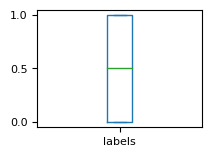

In [34]:
df.plot(kind='box', subplots=True, layout=(22,8), figsize=(20,40), fontsize=8)
plt.show()

In [35]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:

df['sequence_length'] = df['api_sequence'].apply(len)

In [37]:
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)

# Calcular métricas
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

print("Logistic Regression - Accuracy:", accuracy_logistic)
print("Logistic Regression - Precision:", precision_logistic)
print("Logistic Regression - Recall:", recall_logistic)
print("Logistic Regression - ROC AUC:", roc_auc_logistic)

Logistic Regression - Accuracy: 0.9688715953307393
Logistic Regression - Precision: 0.9766233766233766
Logistic Regression - Recall: 0.9616368286445013
Logistic Regression - ROC AUC: 0.990109705209315


In [39]:
# Inicializar el modelo SVM
svm_model = SVC(probability=True)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)


# Calcular métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

print("SVM - Accuracy:", accuracy_svm)
print("SVM - Precision:", precision_svm)
print("SVM - Recall:", recall_svm)
print("SVM - ROC AUC:", roc_auc_svm)

SVM - Accuracy: 0.9649805447470817
SVM - Precision: 0.9918918918918919
SVM - Recall: 0.9386189258312021
SVM - ROC AUC: 0.9890934176874412
